In [26]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import os  
import json

In [27]:
# Define the ticker for Ethereum
eth_ticker = yf.Ticker("ETH-USD")

# Check if the CSV file already exists
if os.path.exists("eth.csv"):
    eth = pd.read_csv("eth.csv", index_col=0)
else:
    eth = eth_ticker.history(period="max")
    eth.to_csv("eth.csv")
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00+00:00,3763.357666,3823.643311,3702.263672,3746.849609,15065849797,0.0,0.0
2024-05-31 00:00:00+00:00,3746.861572,3843.857666,3723.835205,3760.026611,15290700646,0.0,0.0
2024-06-01 00:00:00+00:00,3759.884277,3829.294678,3749.840088,3813.198975,8661024535,0.0,0.0


In [28]:
df = pd.read_csv('eth.csv')
df.head(5) 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
1,2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2,2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
3,2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
4,2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0


In [29]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [30]:
df.drop([ 'Open', 'High', 'Low',  'Dividends', 'Stock Splits', 'Volume'], inplace = True, axis = 1)

In [31]:
df['time'] = pd.to_datetime(df['Date'])
df['formatted_time'] = df['time'].dt.strftime('%d-%m-%Y')
df['formatted_time']

0       09-11-2017
1       10-11-2017
2       11-11-2017
3       12-11-2017
4       13-11-2017
           ...    
2394    30-05-2024
2395    31-05-2024
2396    01-06-2024
2397    02-06-2024
2398    03-06-2024
Name: formatted_time, Length: 2399, dtype: object

In [32]:
df.drop([ 'Date', 'time'], inplace = True, axis = 1)

In [33]:
df

,Close,formatted_time
0,320.884003,09-11-2017
1,299.252991,10-11-2017
2,314.681000,11-11-2017
3,307.907990,12-11-2017
4,316.716003,13-11-2017
...,...,...
2394,3746.849609,30-05-2024
2395,3760.026611,31-05-2024
2396,3813.198975,01-06-2024
2397,3780.895996,02-06-2024


In [34]:
import pandas_ta as ta
 
df['SMA'] = ta.sma(df['Close'], length=5) 
df['EMA'] = ta.ema(df['Close'], length=5) 
df['RSI'] = ta.rsi(df['Close'], length=14) 

In [35]:
df

,Close,formatted_time,SMA,EMA,RSI
0,320.884003,09-11-2017,NaN,NaN,NaN
1,299.252991,10-11-2017,NaN,NaN,NaN
2,314.681000,11-11-2017,NaN,NaN,NaN
3,307.907990,12-11-2017,NaN,NaN,NaN
4,316.716003,13-11-2017,311.888397,311.888397,NaN
...,...,...,...,...,...
2394,3746.849609,30-05-2024,3813.641357,3775.709597,63.639676
2395,3760.026611,31-05-2024,3800.467187,3770.481935,64.095183
2396,3813.198975,01-06-2024,3784.705615,3784.720948,65.948936
2397,3780.895996,02-06-2024,3772.833545,3783.445964,63.794067


In [36]:
df.fillna(0, inplace = True)

In [37]:
new_df = df.copy()

In [38]:
X = new_df.drop(['Close', 'formatted_time'], axis = 1).values
Y = new_df['Close'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


In [41]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [42]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=300)

In [43]:
y_pred_rf = best_rf.predict(X_test)
y_pred_rf

array([1847.66511922, 1859.5257841 ,  151.00765279, 1817.00606527,
       1815.8898763 ,  519.19743296, 3340.8681486 , 1248.02191528,
       2772.64764567,  380.96495911, 1200.48938314,  859.92708598,
       1919.24968913, 3874.32374023, 1648.24229004, 1297.04971761,
        761.19446248, 1582.74768311, 3173.79003255, 2660.01013428,
        437.86846914, 1643.7486792 ,  411.05633372, 1652.8338505 ,
       2050.22435384,  173.99907089, 2347.8899235 , 1947.15810954,
       2653.80577637, 1986.69857992, 1296.85098389,  584.65023895,
       1887.14066243, 1817.97058146, 1785.47446086, 1620.57340332,
        500.14482839,  121.89819519,  172.4732574 ,  239.25147695,
        112.65177432, 2821.22129801,  145.27894305,  250.07403946,
        987.12096476,  598.06162008, 1808.48251017, 1628.23636841,
       2279.75039144,  483.33708964,  398.90631683, 1780.61615804,
        159.23325144, 1571.30144979, 1587.52349935, 3089.24712891,
       3164.53395752, 3723.44520345, 2178.77956177, 3111.73540

In [44]:
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 39.13452791957733, 'MSE': 1531.5112754881775, 'MAE': 20.782217347145078, 'R2': 0.9988232623523331}


In [45]:
len(df)

2399

In [46]:
data = df [len(df) - 15:]

In [47]:
for i in range(10):
    sma = ta.sma(data['Close'], length=5).iloc[-1]
    ema = ta.ema(data['Close'], length=5).iloc[-1]
    rsi = ta.rsi(data['Close'], length=14).iloc[-1]
    # sma_5, ema_5, rsi_14 = scaler.fit_transform(np.array([sma, ema, rsi]).reshape(-1, 1))
    # new_close = best_rf.predict([[0.163528, 0.0, 0.0, 0.0, 1.0, 0.0, sma_5[0], ema_5[0], rsi_14[0]]])
    new_close = best_rf.predict([[sma, ema, rsi]])
    print(new_close)
    new_row = pd.DataFrame({"Close": new_close, "formatted_time" : "0", "SMA" : sma, "EMA" : ema, "RSI" : rsi})
    data = pd.concat([data, new_row], ignore_index= True)
    

[3786.88951579]
[3759.78737142]
[3749.21485352]
[3750.89187419]
[3723.83463704]
[3616.49536947]
[3555.86734049]
[3510.01698486]
[3431.59851807]
[3389.55182861]


In [48]:
data

,Close,formatted_time,SMA,EMA,RSI
0,3663.855469,20-05-2024,3179.579443,3256.483191,70.029124
1,3789.312744,21-05-2024,3348.415771,3434.093042,72.515353
2,3737.217773,22-05-2024,3477.035596,3535.134619,69.921548
3,3776.927246,23-05-2024,3607.831250,3615.732162,70.779529
4,3726.934570,24-05-2024,3738.849561,3652.799631,68.144123
5,3749.236572,25-05-2024,3755.925781,3684.945278,68.703947
6,3825.897461,26-05-2024,3763.242725,3731.929339,70.615536
7,3892.006836,27-05-2024,3794.200537,3785.288505,72.192909
8,3840.256348,28-05-2024,3806.866357,3803.611119,69.067365
9,3763.196533,29-05-2024,3814.118750,3790.139590,64.583517


In [49]:

# Evaluate the model
rf_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
print(rf_metrics)


{'RMSE': 39.13452791957733, 'MSE': 1531.5112754881775, 'MAE': 20.782217347145078, 'R2': 0.9988232623523331}


In [50]:
import pickle 
with open('eth.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

C:\Users\SUBRAT\AppData\Local\Temp\ipykernel_15624\2280981615.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


                          Date        Close          SMA          EMA  \
2391 2024-05-27 00:00:00+00:00  3892.006836          NaN          NaN   
2392 2024-05-28 00:00:00+00:00  3840.256348          NaN          NaN   
2393 2024-05-29 00:00:00+00:00  3763.196533          NaN          NaN   
2394 2024-05-30 00:00:00+00:00  3746.849609          NaN          NaN   
2395 2024-05-31 00:00:00+00:00  3760.026611          NaN          NaN   
2396 2024-06-01 00:00:00+00:00  3813.198975          NaN          NaN   
2397 2024-06-02 00:00:00+00:00  3780.895996          NaN          NaN   
2398 2024-06-03 00:00:00+00:00  3833.744629          NaN          NaN   
2399 2024-06-04 00:00:00+00:00  3828.583986  3786.943164  3800.212186   
2400 2024-06-05 00:00:00+00:00  3803.230678  3803.290039  3809.669452   

            RSI  
2391        NaN  
2392        NaN  
2393        NaN  
2394        NaN  
2395        NaN  
2396        NaN  
2397        NaN  
2398        NaN  
2399  65.764946  
2400  65.390620 

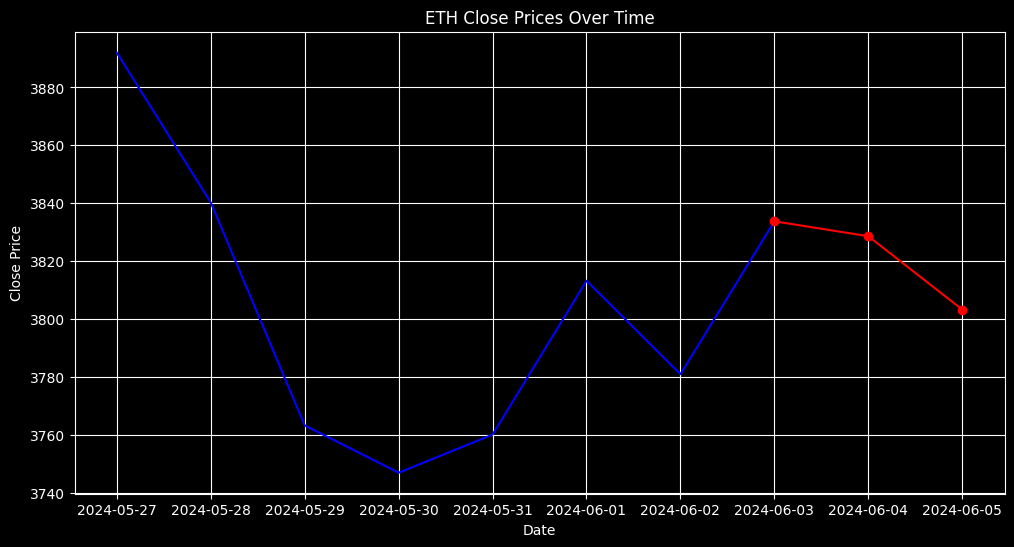

In [51]:
import pandas as pd
import pickle
import pandas_ta as ta
from datetime import timedelta
import matplotlib.pyplot as plt

def file(Type):
    if Type == 'eth':
        df = pd.read_csv('eth.csv', usecols=['Date', 'Close'])
        with open('eth.pkl', 'rb') as f:
            model = pickle.load(f)
        df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
        for i in range(2):
            sma = ta.sma(df['Close'], length=5).iloc[-1]
            ema = ta.ema(df['Close'], length=5).iloc[-1]
            rsi = ta.rsi(df['Close'], length=14).iloc[-1]
            new_close = model.predict([[sma, ema, rsi]])
            new_date = df['Date'].iloc[-1] + timedelta(days=1)
            new_row = {
                "Date": new_date,
                "Close": new_close[0],  # Assuming the model returns an array
                "SMA": sma,
                "EMA": ema,
                "RSI": rsi
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        last_10_days = df.tail(10)
        print(last_10_days)
        
        # Plotting the graph
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        # Plot all but the last two points
        plt.plot(last_10_days['Date'][:-2], last_10_days['Close'][:-2], linestyle='-', color='b')
        
        # Highlight the last two points
        plt.plot(last_10_days['Date'][-3:], last_10_days['Close'][-3:], linestyle='-', color='r', marker='o')
        plt.title('ETH Close Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.grid(True)  
        plt.show()

# Call the function with 'eth'
file('eth')
